In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from LSTM import *
from LSTMbis import *
import pandas as pd
import numpy as np
import torch.utils.data as utils
import time

import pdb

torch.manual_seed(1)

In [2]:
import os
data = {}
a=0
for i in os.listdir('./new_data/4'):

    if i.endswith('.txt'):
        a = a+1
        data['%s'%a] = pd.read_csv('new_data/4/%s'%i, header = None, 
                                         names = ['frameNb','id', 'x','y'],delimiter=' ')

In [3]:
a = 0
inputs = np.zeros([10,len(data),2])
gt = np.zeros([11,len(data),2])

for i in data:
    inputs[:,a,:] = np.array(data['%s'%i].loc[0:9,['x','y']])
    gt[:,a,:] = np.array(data['%s'%i].loc[9:,['x','y']])
    a +=1


inputs = torch.from_numpy(inputs).float()
gt = torch.from_numpy(gt).float()
inputs = inputs.permute([1,0,2])
gt = gt.permute([1,0,2])

In [4]:
from torch import optim

lstm = LSTM(2)
optimizer = optim.SGD(lstm.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [5]:
traindataset = utils.TensorDataset(inputs, gt[:,1:,:])
trainloader = utils.DataLoader(traindataset, batch_size=4, shuffle=True)

epochs = 500
steps = 0
print_every = 100
running_loss = 0 #### DOD

for e in range(epochs):
    start = time.time()
    for train_coord, ground_tru in iter(trainloader):
        steps += 1
        
        train_coord = train_coord.permute([1,0,2])
        ground_tru = ground_tru.permute([1,0,2])

        in_train = Variable(train_coord)
        targets = Variable(ground_tru)
        optimizer.zero_grad()
        #print(in_train.shape)
        #print(targets.shape)
        #pdb.set_trace()
        out = lstm.forward(in_train)
        loss = criterion(out, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]

    
        if steps % print_every == 0:
                stop = time.time()
                print("Epoch: {}/{}..".format(e+1, epochs),
                  "Loss: {:.4f}..".format(running_loss/print_every),
                  "{:.4f} s/batch".format((stop - start)/print_every)
                 )
                running_loss = 0
                start = time.time()

/Users/rodolphefarrando/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 2/500.. Loss: 7.0575.. 0.0014 s/batch
Epoch: 4/500.. Loss: 3.9821.. 0.0005 s/batch
Epoch: 5/500.. Loss: 3.4402.. 0.0020 s/batch
Epoch: 7/500.. Loss: 3.4343.. 0.0011 s/batch
Epoch: 9/500.. Loss: 2.9036.. 0.0003 s/batch
Epoch: 10/500.. Loss: 3.0490.. 0.0016 s/batch
Epoch: 12/500.. Loss: 2.9828.. 0.0010 s/batch
Epoch: 14/500.. Loss: 2.9207.. 0.0002 s/batch
Epoch: 15/500.. Loss: 2.8273.. 0.0015 s/batch
Epoch: 17/500.. Loss: 2.7343.. 0.0009 s/batch
Epoch: 19/500.. Loss: 2.7599.. 0.0001 s/batch
Epoch: 20/500.. Loss: 2.8333.. 0.0014 s/batch
Epoch: 22/500.. Loss: 2.6739.. 0.0007 s/batch
Epoch: 23/500.. Loss: 2.5761.. 0.0019 s/batch
Epoch: 25/500.. Loss: 2.4445.. 0.0013 s/batch
Epoch: 27/500.. Loss: 2.5980.. 0.0004 s/batch
Epoch: 28/500.. Loss: 2.4268.. 0.0017 s/batch
Epoch: 30/500.. Loss: 2.3402.. 0.0010 s/batch
Epoch: 32/500.. Loss: 2.4563.. 0.0004 s/batch
Epoch: 33/500.. Loss: 2.2992.. 0.0016 s/batch
Epoch: 35/500.. Loss: 2.2459.. 0.0010 s/batch
Epoch: 37/500.. Loss: 2.2516.. 0.0001 s

Epoch: 291/500.. Loss: 1.9274.. 0.0004 s/batch
Epoch: 292/500.. Loss: 1.9563.. 0.0016 s/batch
Epoch: 294/500.. Loss: 2.0608.. 0.0010 s/batch
Epoch: 296/500.. Loss: 1.8883.. 0.0001 s/batch
Epoch: 297/500.. Loss: 1.9484.. 0.0015 s/batch
Epoch: 299/500.. Loss: 2.0042.. 0.0009 s/batch
Epoch: 300/500.. Loss: 1.8991.. 0.0021 s/batch
Epoch: 302/500.. Loss: 1.8870.. 0.0014 s/batch
Epoch: 304/500.. Loss: 2.0538.. 0.0005 s/batch
Epoch: 305/500.. Loss: 1.9172.. 0.0021 s/batch
Epoch: 307/500.. Loss: 1.9915.. 0.0012 s/batch
Epoch: 309/500.. Loss: 1.9231.. 0.0004 s/batch
Epoch: 310/500.. Loss: 1.9440.. 0.0018 s/batch
Epoch: 312/500.. Loss: 1.9641.. 0.0011 s/batch
Epoch: 314/500.. Loss: 1.8044.. 0.0002 s/batch
Epoch: 315/500.. Loss: 2.0086.. 0.0016 s/batch
Epoch: 317/500.. Loss: 2.0273.. 0.0008 s/batch
Epoch: 319/500.. Loss: 1.9254.. 0.0001 s/batch
Epoch: 320/500.. Loss: 1.9465.. 0.0015 s/batch
Epoch: 322/500.. Loss: 1.9861.. 0.0007 s/batch
Epoch: 323/500.. Loss: 1.9097.. 0.0019 s/batch
Epoch: 325/50

In [6]:
inputs = inputs.permute([1,0,2])
gt = gt.permute([1,0,2])
output_final = lstm.predict(inputs)

inputs = inputs.numpy()
gt = gt.numpy()
output_final = output_final.data.numpy()

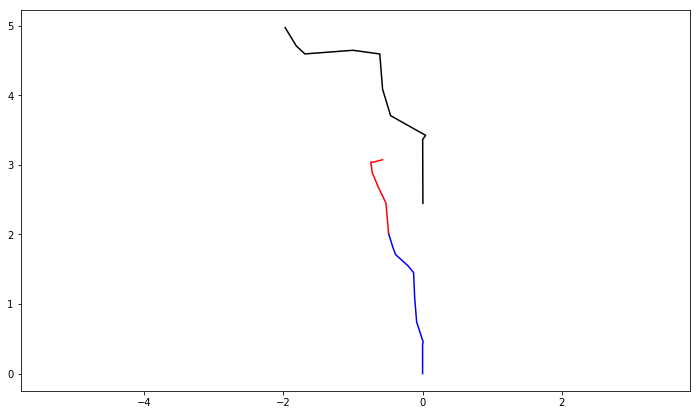

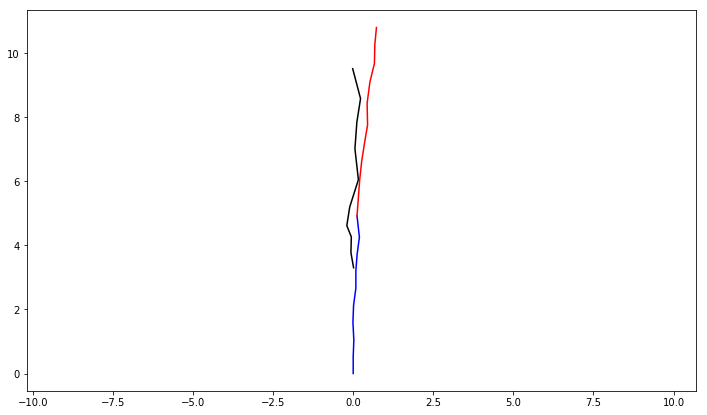

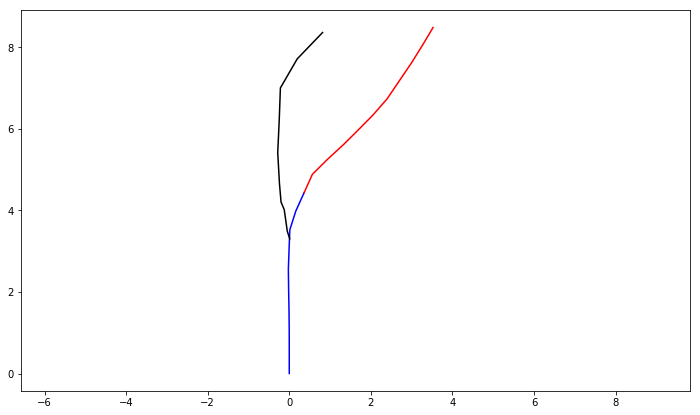

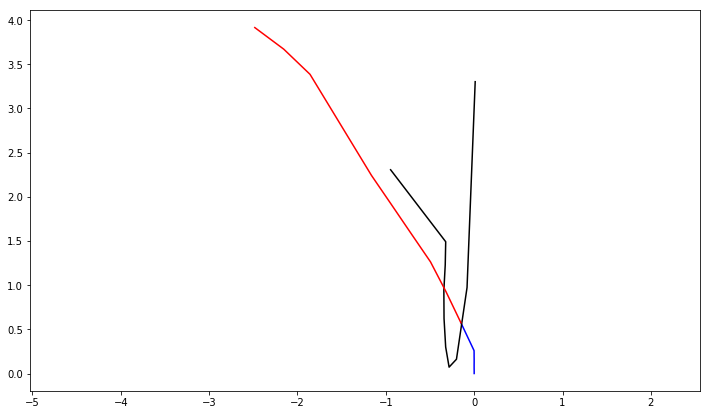

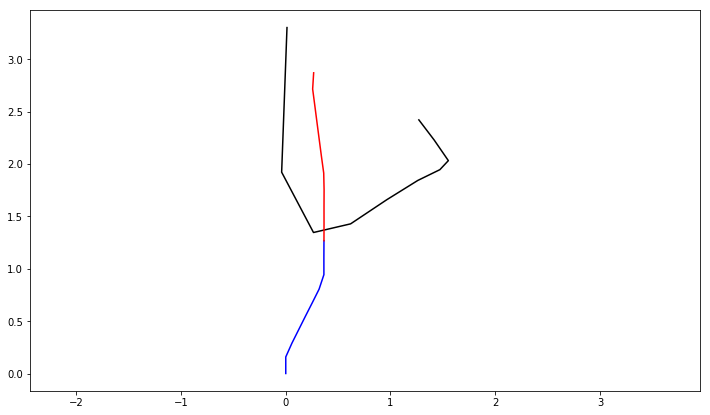

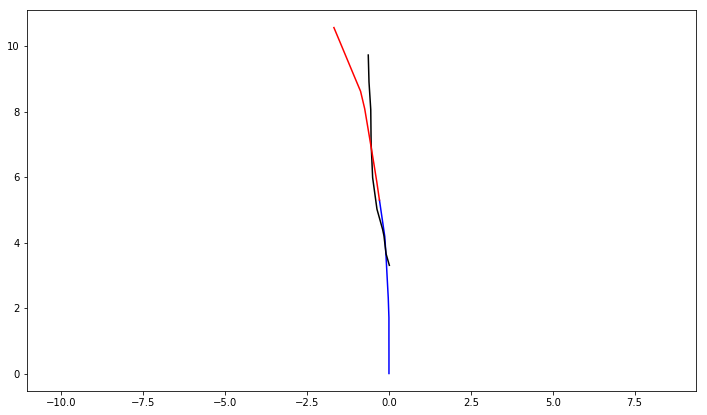

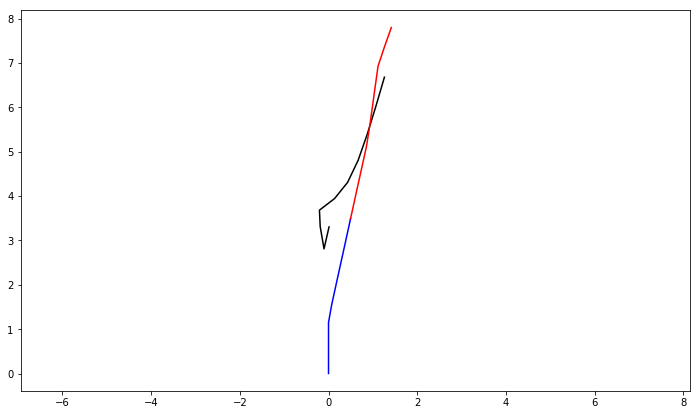

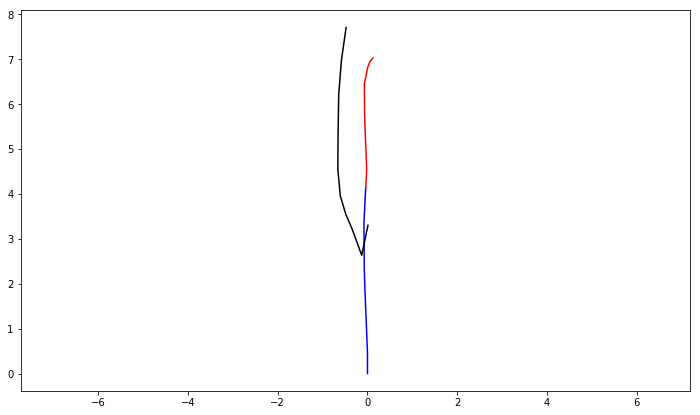

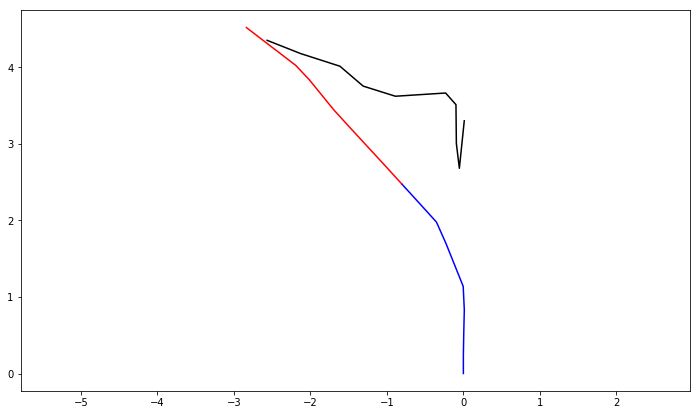

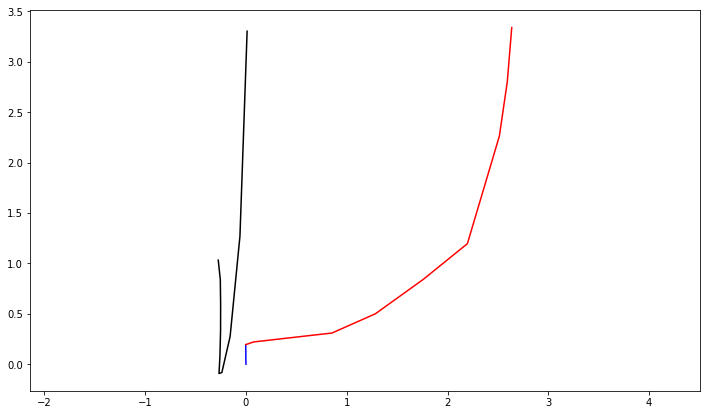

In [7]:
for i in range(10):
    plt.figure(figsize=(12, 7))

    plt.plot(inputs[:,i*14,0],inputs[:,i*14,1],c='b')
    plt.plot(output_final[:,i*14,0],output_final[:,i*14,1],c = 'k')
    plt.plot(gt[:,i*14,0],gt[:,i*14,1],c='r')
    plt.axis('equal')